In [1]:
"""
https://www.tensorflow.org/tutorials/keras/regression
https://www.tensorflow.org/guide/keras/preprocessing_layers
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from pathlib import Path
import numpy as np
import pandas as pd

from df_collector import df_collector
from model_settings import ms
from convsklearn import convsklearn

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

def plot_relative_spot(x, y):
    plt.scatter(train_features['relative_spot'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('relative_spot')
    plt.ylabel('relative_price')
    plt.legend()

In [2]:
ms.find_root(Path())
datadir = os.path.join(ms.root,ms.cboe_spx_short_term_asians['dump'])
df = df_collector.collect_dfs(datadir).iloc[:,1:]

conv = convsklearn()
conv.load_data(df)

if datadir.find('asian') != -1:
	pricename = 'asian_price'

elif datadir.find('barrier') !=-1:
	pricename = 'barrier_price'
else:
	print('unknown model')
	pricename = ''



df['relative_price'] = df[pricename]/df['strike_price']
df['relative_spot'] = df['spot_price']/df['strike_price']

cats = conv.categorical_features
nums = conv.numerical_features
nums = [n for n in nums if n.find('strike_price')==-1 and n.find('spot_price')==-1]
nums = nums + ['relative_spot']

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.18.0


In [5]:
raw_dataset = df

In [6]:
dataset = raw_dataset.copy()
dataset.tail()

,spot_price,strike_price,days_to_maturity,n_fixings,fixing_frequency,past_fixings,averaging_type,w,risk_free_rate,dividend_rate,calculation_date,kappa,theta,rho,eta,v0,date,asian_price,relative_price,relative_spot
338935,5857.0,7320.75,84,1.0,84,0,arithmetic,put,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,2.286232e-09,-0.717809,1.487001,0.121595,2024-10-14,1429.795085,0.195307,0.800055
338936,5857.0,8785.00,84,1.0,84,0,geometric,call,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,2.286232e-09,-0.717809,1.487001,0.121595,2024-10-14,0.000000,0.000000,0.666705
338937,5857.0,8785.00,84,1.0,84,0,geometric,put,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,2.286232e-09,-0.717809,1.487001,0.121595,2024-10-14,2887.934074,0.328735,0.666705
338938,5857.0,8785.00,84,1.0,84,0,arithmetic,call,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,2.286232e-09,-0.717809,1.487001,0.121595,2024-10-14,0.000000,0.000000,0.666705
338939,5857.0,8785.00,84,1.0,84,0,arithmetic,put,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,2.286232e-09,-0.717809,1.487001,0.121595,2024-10-14,2879.992268,0.327831,0.666705


In [7]:
dataset.isna().sum()

spot_price          0
strike_price        0
days_to_maturity    0
n_fixings           0
fixing_frequency    0
past_fixings        0
averaging_type      0
w                   0
risk_free_rate      0
dividend_rate       0
calculation_date    0
kappa               0
theta               0
rho                 0
eta                 0
v0                  0
date                0
asian_price         0
relative_price      0
relative_spot       0
dtype: int64

In [8]:
dataset = dataset.dropna()

In [9]:
dataset = pd.get_dummies(dataset, columns=['w','averaging_type'], prefix='', prefix_sep='')
dataset.tail()

,spot_price,strike_price,days_to_maturity,n_fixings,fixing_frequency,past_fixings,risk_free_rate,dividend_rate,calculation_date,kappa,...,eta,v0,date,asian_price,relative_price,relative_spot,call,put,arithmetic,geometric
338935,5857.0,7320.75,84,1.0,84,0,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,...,1.487001,0.121595,2024-10-14,1429.795085,0.195307,0.800055,False,True,True,False
338936,5857.0,8785.00,84,1.0,84,0,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,...,1.487001,0.121595,2024-10-14,0.000000,0.000000,0.666705,True,False,False,True
338937,5857.0,8785.00,84,1.0,84,0,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,...,1.487001,0.121595,2024-10-14,2887.934074,0.328735,0.666705,False,True,False,True
338938,5857.0,8785.00,84,1.0,84,0,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,...,1.487001,0.121595,2024-10-14,0.000000,0.000000,0.666705,True,False,True,False
338939,5857.0,8785.00,84,1.0,84,0,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,...,1.487001,0.121595,2024-10-14,2879.992268,0.327831,0.666705,False,True,True,False


In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
test_dataset

,spot_price,strike_price,days_to_maturity,n_fixings,fixing_frequency,past_fixings,risk_free_rate,dividend_rate,calculation_date,kappa,...,eta,v0,date,asian_price,relative_price,relative_spot,call,put,arithmetic,geometric
1,1274.0,637.00,7,1.0,7,0,0.001578,0.020858,2012-01-03 13:00:22.494,3.183380,...,0.601996,0.012430,2012-01-03,0.000000,0.000000,2.000000,False,True,False,True
4,1274.0,955.50,7,1.0,7,0,0.001578,0.020858,2012-01-03 13:00:22.494,3.183380,...,0.601996,0.012430,2012-01-03,318.154658,0.332972,1.333333,True,False,False,True
21,1274.0,637.00,28,4.0,7,0,0.001578,0.020858,2012-01-03 13:00:22.494,3.183380,...,0.601996,0.012430,2012-01-03,0.000000,0.000000,2.000000,False,True,False,True
22,1274.0,637.00,28,4.0,7,0,0.001578,0.020858,2012-01-03 13:00:22.494,3.183380,...,0.601996,0.012430,2012-01-03,635.769470,0.998068,2.000000,True,False,True,False
27,1274.0,955.50,28,4.0,7,0,0.001578,0.020858,2012-01-03 13:00:22.494,3.183380,...,0.601996,0.012430,2012-01-03,0.000000,0.000000,1.333333,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338920,5857.0,2928.00,84,1.0,84,0,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,...,1.487001,0.121595,2024-10-14,2912.984997,0.994872,2.000342,True,False,False,True
338927,5857.0,4392.25,84,1.0,84,0,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,...,1.487001,0.121595,2024-10-14,3.133825,0.000713,1.333485,False,True,True,False
338930,5857.0,5856.50,84,1.0,84,0,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,...,1.487001,0.121595,2024-10-14,197.187208,0.033670,1.000085,True,False,True,False
338931,5857.0,5856.50,84,1.0,84,0,0.041813,0.012687,2024-10-14 15:26:27.717,4.067045,...,1.487001,0.121595,2024-10-14,176.724454,0.030176,1.000085,False,True,True,False


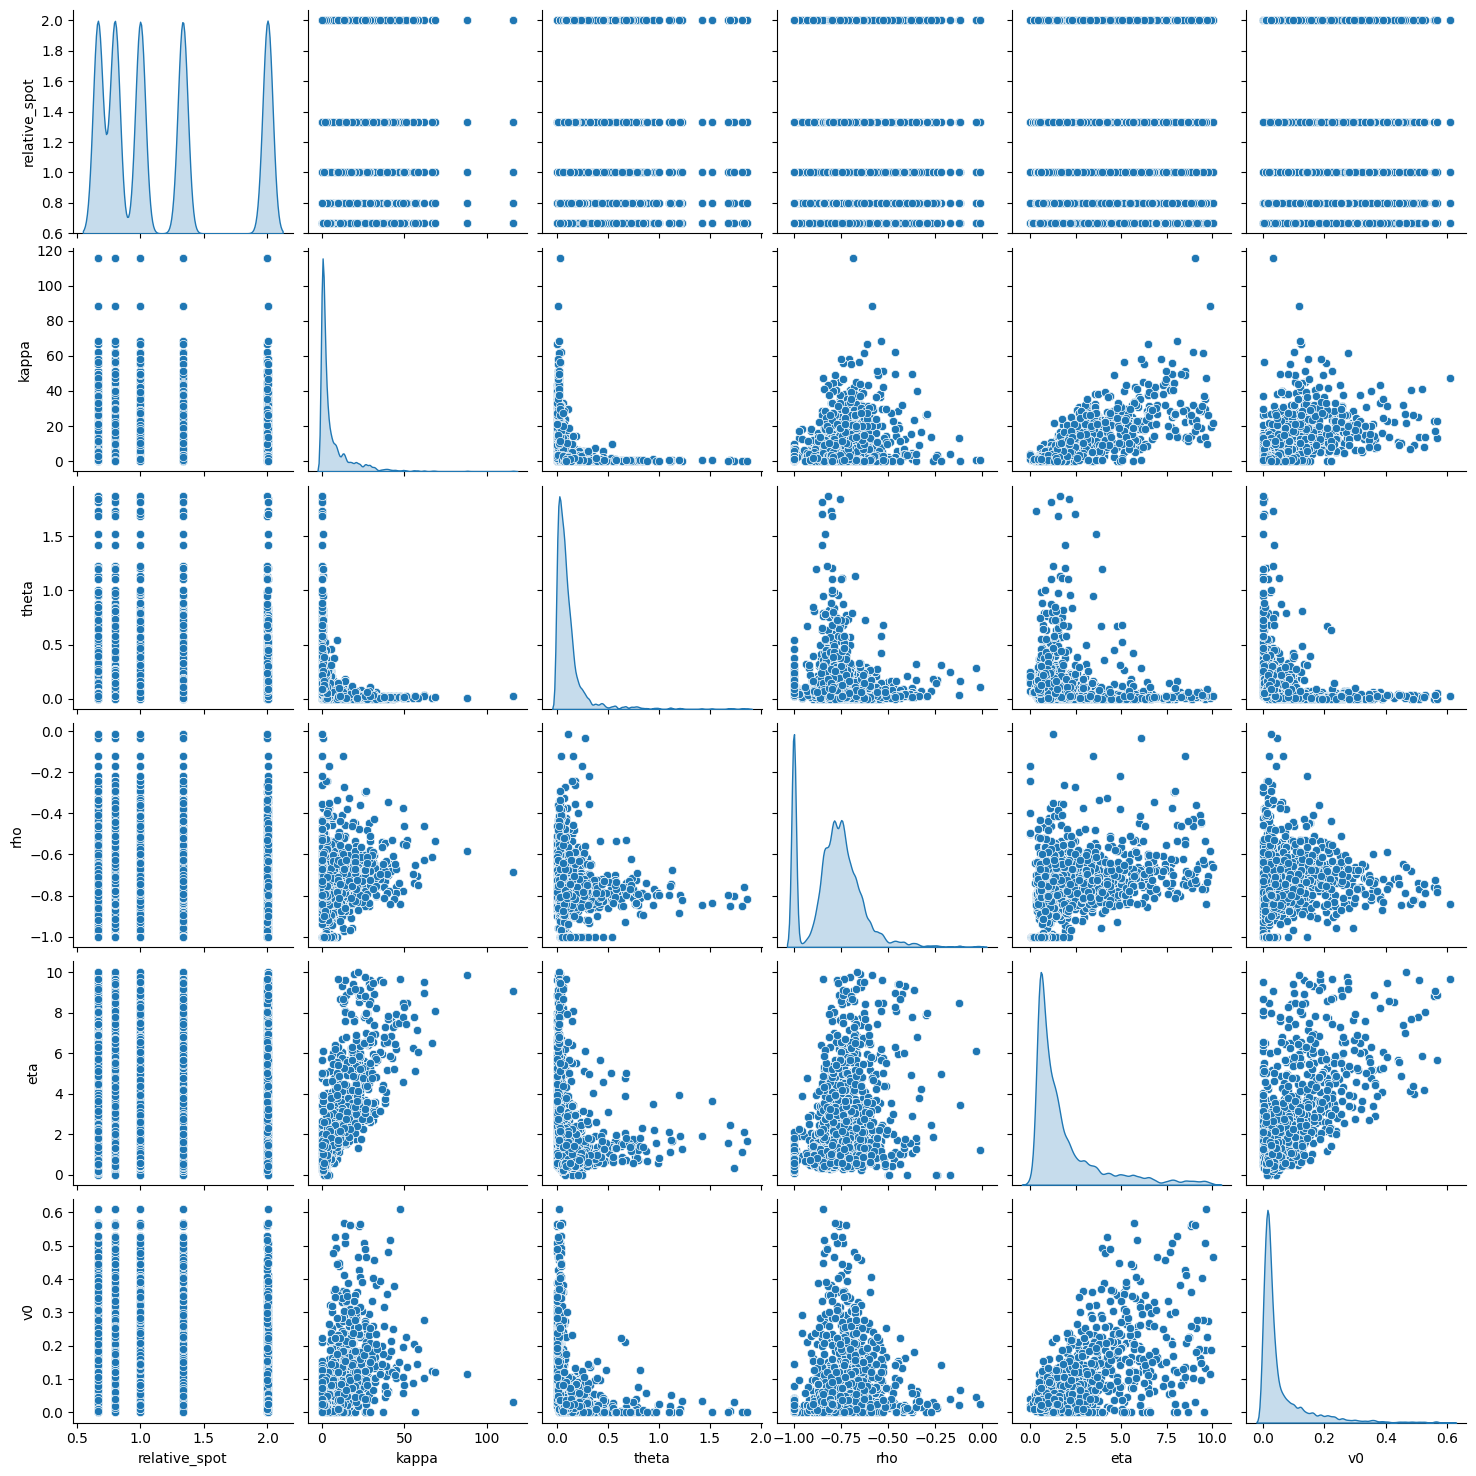

In [11]:
sns.pairplot(train_dataset[['relative_spot','kappa', 'theta', 'rho', 'eta', 'v0',]], diag_kind='kde')

In [12]:
target = 'relative_price'
train_features = train_dataset[nums+train_dataset.columns.tolist()[-4:]+[target]]
test_features = test_dataset[nums+test_dataset.columns.tolist()[-4:]+[target]]

train_labels = train_features.pop('relative_price')
test_labels = test_features.pop('relative_price')

In [13]:
train_features

,days_to_maturity,fixing_frequency,past_fixings,risk_free_rate,dividend_rate,kappa,theta,rho,eta,v0,relative_spot,call,put,arithmetic,geometric
295435,28,28,0,0.049994,0.017075,7.957564e+00,0.015931,-0.742704,4.207898,0.525958,0.800000,False,True,True,False
134884,84,7,0,0.005394,0.021655,1.970987e+00,0.173937,-0.999986,0.925147,0.011699,1.333333,True,False,False,True
125529,84,7,0,0.005498,0.021077,3.003449e-01,0.530513,-0.766493,1.441134,0.000232,1.000000,False,True,False,True
330654,84,84,0,0.051284,0.013549,5.307177e+00,0.033218,-0.706294,3.679198,0.008738,0.800000,True,False,True,False
74038,28,28,0,0.000761,0.019401,1.315619e+01,0.023853,-0.754887,2.222713,0.025611,0.666667,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188834,7,7,0,0.025664,0.020948,1.258806e-06,0.143431,-0.626025,1.295959,0.041296,0.800000,True,False,True,False
274210,84,7,0,0.011911,0.014048,2.758219e+01,0.063773,-0.641004,4.390960,0.082120,1.000114,True,False,True,False
122963,28,7,0,0.004680,0.022418,1.628422e+00,0.167592,-0.899726,1.391640,0.025545,2.000976,False,True,True,False
246370,7,7,0,0.000609,0.014924,1.385229e+00,0.126486,-0.999995,0.588086,0.020935,1.000129,True,False,True,False


In [14]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
spot_price,2878.600446,1134.396391
strike_price,2877.407425,1575.976433
days_to_maturity,48.218118,32.894470
n_fixings,2.784892,3.431675
fixing_frequency,31.064643,29.692780
past_fixings,0.000000,0.000000
risk_free_rate,0.014264,0.016957
dividend_rate,0.018589,0.002728
kappa,6.429634,10.200759
theta,0.116553,0.180258


In [15]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [16]:
normalizer.adapt(np.array(train_features))

In [17]:
print(normalizer.mean.numpy())

[[48.218 31.065  0.     0.014  0.019  6.43   0.117 -0.787  1.87   0.059
   1.161  0.5    0.5    0.5    0.5  ]]


In [18]:
train_features

,days_to_maturity,fixing_frequency,past_fixings,risk_free_rate,dividend_rate,kappa,theta,rho,eta,v0,relative_spot,call,put,arithmetic,geometric
295435,28,28,0,0.049994,0.017075,7.957564e+00,0.015931,-0.742704,4.207898,0.525958,0.800000,False,True,True,False
134884,84,7,0,0.005394,0.021655,1.970987e+00,0.173937,-0.999986,0.925147,0.011699,1.333333,True,False,False,True
125529,84,7,0,0.005498,0.021077,3.003449e-01,0.530513,-0.766493,1.441134,0.000232,1.000000,False,True,False,True
330654,84,84,0,0.051284,0.013549,5.307177e+00,0.033218,-0.706294,3.679198,0.008738,0.800000,True,False,True,False
74038,28,28,0,0.000761,0.019401,1.315619e+01,0.023853,-0.754887,2.222713,0.025611,0.666667,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188834,7,7,0,0.025664,0.020948,1.258806e-06,0.143431,-0.626025,1.295959,0.041296,0.800000,True,False,True,False
274210,84,7,0,0.011911,0.014048,2.758219e+01,0.063773,-0.641004,4.390960,0.082120,1.000114,True,False,True,False
122963,28,7,0,0.004680,0.022418,1.628422e+00,0.167592,-0.899726,1.391640,0.025545,2.000976,False,True,True,False
246370,7,7,0,0.000609,0.014924,1.385229e+00,0.126486,-0.999995,0.588086,0.020935,1.000129,True,False,True,False


In [ ]:
# linear models

# dnn

In [20]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [21]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (271152, 15)                │              31 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (128.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 31 (128.00 B)

In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')